### Table of contents 

#### [Part 1. Prioritizing Hypotheses](#1)  
#### [Part 2. A/B Test Analysis.](#2)  

<a id="1"></a>

### Part 1. Prioritizing Hypotheses

In [1]:
# importing data
import pandas as pd
import numpy as np
from scipy import stats as st
import scipy.stats as stats
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [2]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


 - **Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.**

In [3]:
# adding ICE column (impact * confidence / effort)
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
# sorting by ICE in descending order
hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


We have prioritized the hypotheses using ICE score. Top three hypotheses: <br>
 1. **Launching a promotion that give users discounts** = 16.2 ICE score,<br>
 2. **Add two new channels for attracting traffic** = 13.3 ICE score<br>
 3. **Add a subscription form all the main pages** = 11.2 ICE score  

 - **Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.**

In [4]:
# adding RICE column (reach * impact * confidence) / efforts
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
# sorting by RICE in descending order
hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


#### Conclusion

In this case, we have calculated RICE framework to prioritize hypotheses, and the results are different from ICE framework, mainly because *Reach* component has been added to the calculation. Top three hypotheses according to RICE score are:<br>
 1. **Add a subscription form to all the main pages** = 112 RICE Score. The main reason is that by adding subscription form to the main pages all users will be affected thus the Reach component is 10 and we are quiet sure (Confidence = 8) that this hypothesis will affect users the way we expect.
 2. **Add product recommendation blocks to the store** = 56 RICE Score. Reach is 8 meaning most of the users will be affected by that addition to the store.
 3. **Add two new channels for attracting traffic** and **Show bannners with current offers and sales** have the same score = 40 RICE score, where the the Impact is 10 meaning this update will affect the users, their experience, and their satisfaction with the product for the first-mentioned hypothesis. 

<a id="2"></a>

### Part 2. A/B Test Analysis

In [5]:
# importing datasets
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [6]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
# converting to datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

The group sizes are different. In group A, there are 557 people, whereas in B the number of orders is 640

In [12]:
# looking for visitors who are present in more than 1 group
mistake = (orders.groupby(['visitorId'])['group'].nunique().reset_index().query('group > 1'))

In [13]:
mistake

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2
84,351125977,2
97,393266494,2
114,457167155,2
119,471551937,2
122,477780734,2


In [14]:
# the subset of the users that got into both groups) converting to list
listed = mistake['visitorId'].tolist()

In [15]:
# filtering out the listed visitors who were in both groups
filtered_orders = ~(orders.visitorId.isin(listed))

In [16]:
filtered_orders

0        True
1        True
2       False
3        True
4        True
        ...  
1192     True
1193     True
1194     True
1195    False
1196     True
Name: visitorId, Length: 1197, dtype: bool

In [17]:
filtered_orders = orders[filtered_orders]

In [18]:
filtered_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [19]:
filtered_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null float64
group            1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [20]:
filtered_orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

We have filtered our `orders` dataset from user who were present in both groups. We will do our analysis excluding those users.

In [21]:
# checking for missing values
filtered_orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [22]:
# checking for duplicated values
filtered_orders.duplicated().sum()

0

#### Conclusion
 - Before jumping straight to A/B test, we have cleaned the data of users who were present in both groups.
 - No missing and duplicated values were found
 - Converted `date` column to datetime

 1. **Graph cumulative revenue by group. Make conclusions and conjectures.**

To plot the graphs, we have to collect cumulative data. Let's declare a DataFrame called cumulativeData.

In [23]:
# building an array with unique paired date-group values 
datesGroups = filtered_orders[['date','group']].drop_duplicates() 

In [24]:
datesGroups.head(5)

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [25]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [26]:
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: filtered_orders[np.logical_and(filtered_orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [28]:
#  getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [29]:
visitorsAggregated.head(5)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [30]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [31]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


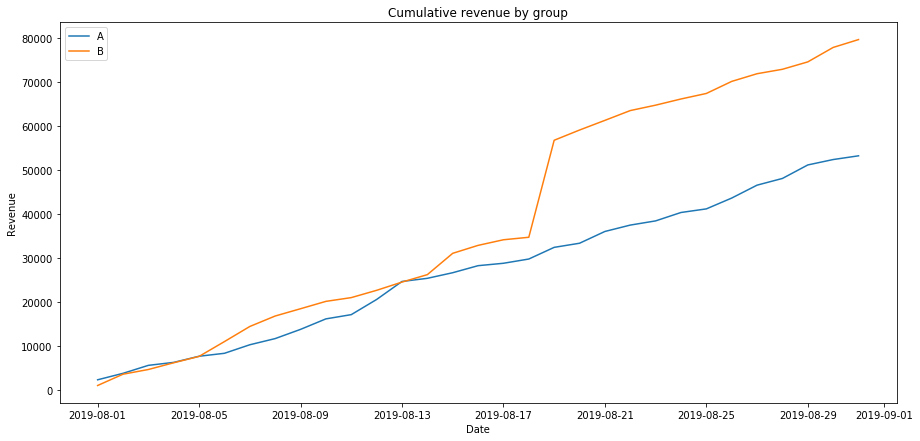

In [32]:
from matplotlib.pyplot import figure
figure(figsize=(15,7))
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A',)

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', )

plt.legend()
plt.title('Cumulative revenue by group')
plt.xlabel('Date')
plt.ylabel('Revenue');

The graph below illustrates the revenue of two groups for a period of a month. From August 2019 to September 2019. Revenue is rising steadily throughout the whole test in both groups. That's a good sign. But we can see a hughe spike from 30k to 50 in revenue after the second week of testing. Thats clearly a sign that has worked sucessfully resulting in higher revenue for group B.

 2. **Graph cumulative average order size by group. Make conclusions and conjectures.**

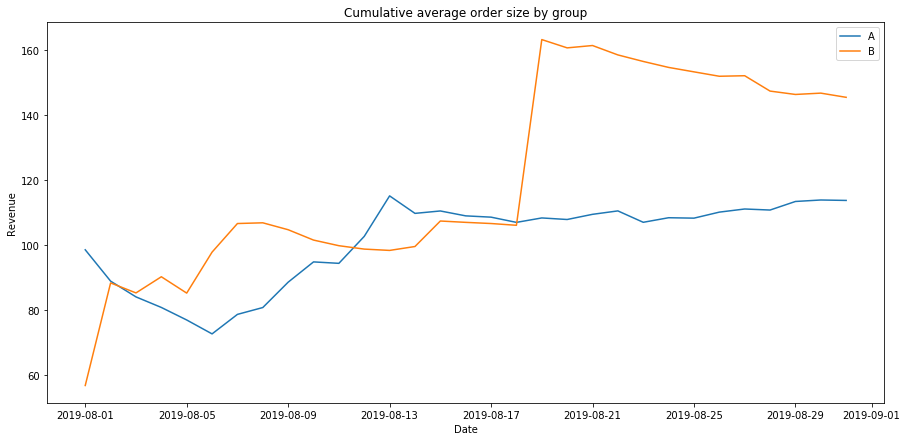

In [33]:
# We'll divide cumulative revenue by the cumulative number of orders
figure(figsize=(15,7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Cumulative average order size by group')
plt.xlabel('Date')
plt.ylabel('Revenue');

Average purchase size also increases after the first week of the test. It stabilizes for group A and skyrockets for group B on the same period where we have seen the huge increase in revenue. The surge in group B in the second half of the test may have been due to the presence of large, expensive orders or product seasonality.

 3. **Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**

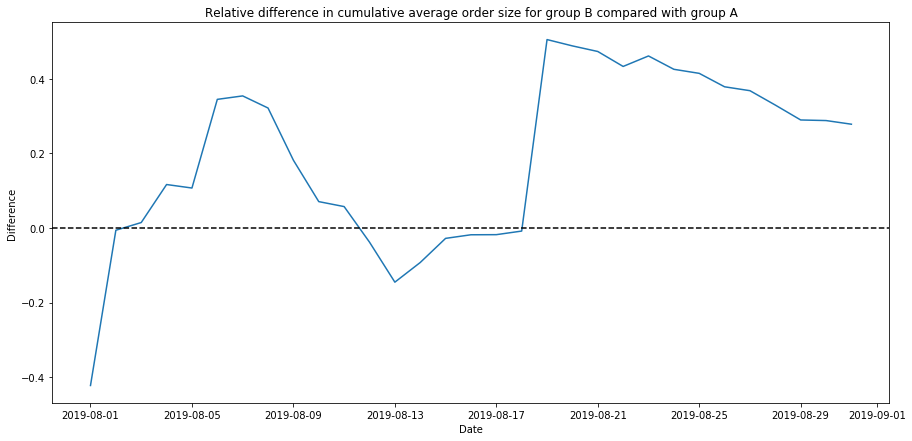

In [34]:
# We'll add a horizontal axis with the axhline() method
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
figure(figsize=(15,7))

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Relative difference in cumulative average order size for group B compared with group A')
plt.xlabel('Date')
plt.ylabel('Difference');


At several points the difference between the segments spikes. This means there must be some big orders and outliers! We'll find them later. The average order size of group B is comparatively bigger than the average order size of group A in the second half of the test period.

 4. **Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**

We'll analyze the cumulative conversion graph in an analogous way. Let's scale the axes with the plt.axis() method, passing the minimum and maximum X axis values and the minimum and maximum Y axis values to the method.

In [35]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


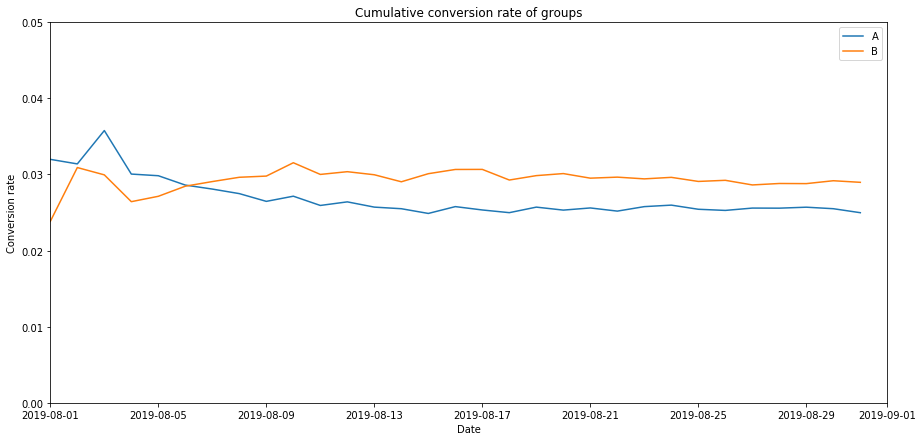

In [36]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Cumulative conversion rate of groups')
plt.xlabel('Date')
plt.ylabel('Conversion rate')

# setting the axes' scale
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]);

The cumulative conversion rates of both groups seem to be stabilized after the first week of testing period. Overall, the conversion rate of group B is slightly higher than the conversion rate of group A.

 5. **Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

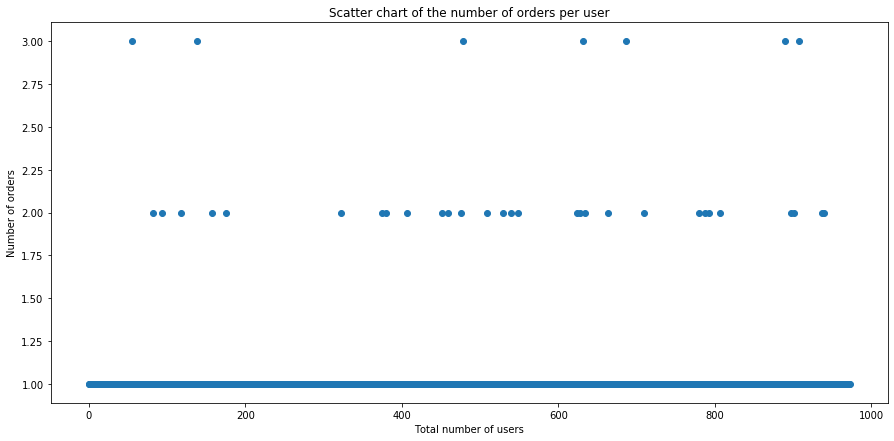

In [37]:
ordersByUsers = (
    filtered_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Scatter chart of the number of orders per user')
plt.xlabel('Total number of users')
plt.ylabel('Number of orders');

Most of the users have placed only 1 order, the number of users with 2 orders are also not small. Users with 3 orders are the outliers 

 6. **Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [38]:
# 95, 99 percentiles for the number of orders per user
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Not more than 1% of users placed more than 2 orders. Not more than 5% of users placed more than one order. It would be reasonable to set the 1-2 orders per users as the lower limit for the number of orders and to filter anomalies on that basis. 

 7. **Plot a scatter chart of order prices. Make conclusions and conjectures.**

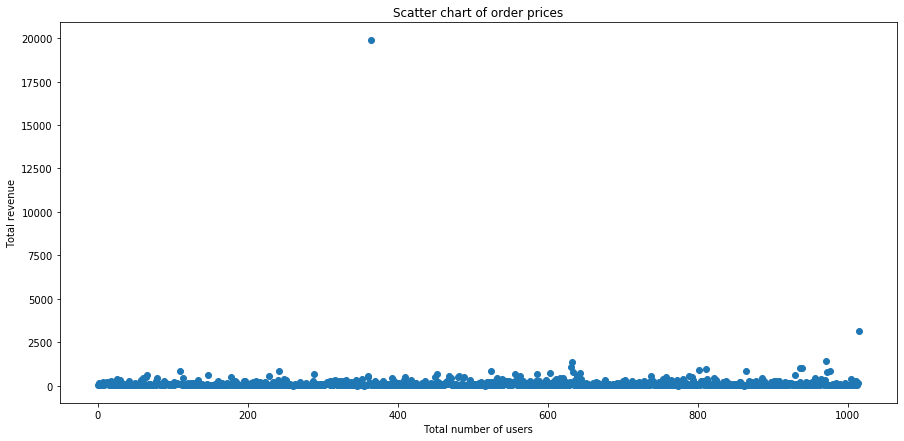

In [39]:
x_values_rev = pd.Series(range(0,len(filtered_orders['revenue'])))
plt.figure(figsize=(15,7))
plt.title('Scatter chart of order prices')
plt.xlabel('Total number of users')
plt.ylabel('Total revenue')
plt.scatter(x_values_rev, filtered_orders['revenue']);


According to the scatter plot above, there are not many orders above 2,500 USD. There are outliers including 2,500 USD and above which is observed about 20,000 USD.

 8. **Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [40]:
print(np.percentile(filtered_orders['revenue'], [90, 95, 99]))

[280.8   414.275 830.3  ]


Not more than 5 % of users placed orders that cost more than 414.2 USD. Not more than 1 % placed orders more expensive than 830 USD.

 9. **Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**

*We have to keep in mind that we set statistical significance of: alpha = 0.05* <br>
***H0: There is no a significant difference in conversion between groups*** <br>
***H1: There is significant difference in conversion between groups***

In [41]:
# We'll create the variables ordersByUsersA and ordersByUsersB to store the columns ['userId', 'orders'].
# For users with at least one order, we'll indicate the number of orders made.

ordersByUsersA = filtered_orders[filtered_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = filtered_orders[filtered_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

Now we'll declare the variables `sampleA` and `sampleB`, with users from different groups and corresponding numbers of orders. Those who didn't order anything will have 0.
This is necessary to prepare the samples for the Mann-Whitney test.



`sampleA` must have two parts:<br>
 1. A list of the number of orders for each user: `ordersByUsersA['orders']`.
 2. Zeroes for users who didn't order anything. Their number is the difference between the total number of visitors and the number of records on orders: `visitors[visitors['group']=='A']['visitors'].sum()` - `len(ordersByUsersA['orders'])`

In [42]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [43]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

To get the group's conversion rate, we'll need to divide the sum of the orders by the number of users. Using the `mean()` method, we'll find the mean for `sampleA`. We'll find the conversion rate for group B in a similar way: `sampleB.mean()`

In [44]:
# Calculate and print the relative difference in conversion between the groups
alpha = 0.05
p_value = (stats.mannwhitneyu(sampleA, sampleB,)[1])
rgain = (sampleB.mean()/sampleA.mean()-1)
if (p_value < alpha):
    print("Reject H0: There is no a significant difference in conversion between groups, p-value: {0:.5f}".format(p_value))
else:
    print("Failed to reject the null hypothesis, p-value: {0:.5f}".format(p_value))

print("Relative conversion gain/loss for group B compared with group A: {0:.3f}".format(rgain))

Reject H0: There is no a significant difference in conversion between groups, p-value: 0.00551
Relative conversion gain/loss for group B compared with group A: 0.160


We want to test the statistical significance of the difference in conversion between groups A and B. This can be done using the Mann-Wilcoxon-Whitney non-parametric test which ranks two samples in ascending order and compares the ranks of the values that appears in both samples. If the differences between their ranks are the same from sample to sample, it means the shirt is typical (some values were added, causing the rest of the values to shift). On the other hand, a non-typical shift means a real change occurred and the sum of such shifts in rank if the value of the criterion

The first row of the output gives us the p-value, 0.00551, which is less than our alpha 0.05. So we reject the null hypothesis. The raw data showed that the group's conversion rates have statistically significant differences.  Moreover, the relative conversion gain of group B compared with group A is 16.0%.

 10. **Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.**

To calculate the statistical significance of the difference in the segments' average order size, we'll pass the data on revenue to the `mannwhitneyu()` criterion.

*We have to keep in mind that we set statistical significance of: alpha = 0.05* <br>
***H0: There is no a significant difference in average order size between groups*** <br>
***H1: There is significant difference in average order size between groups***

In [45]:
# Calculate statistical significance of the differennce in average order size
alpha = 0.05
pvalue = (stats.mannwhitneyu(filtered_orders[filtered_orders['group']=='A']['revenue'], filtered_orders[filtered_orders['group']=='B']['revenue'])[1])
r_gain = (filtered_orders[filtered_orders['group']=='B']['revenue'].mean()/filtered_orders[filtered_orders['group']=='A']['revenue'].mean()-1)
if (pvalue < alpha):
    print('Reject H0: There is no significant difference in average order size between groups, p-value: {0:.5f}'.format(pvalue))
else:
    print("Failed to reject H0, p-value: {0:.5f}".format(pvalue))

print('Relative difference in average order size of group B compared to A: {0:.3f}'.format(r_gain))

Failed to reject H0, p-value: 0.43112
Relative difference in average order size of group B compared to A: 0.278


The p-value = 0.43112 is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that there are no significant differences between groups' average order sizez And the average order size of group B is much higher than it is for group A. The relative difference is 27.8 % 

 11. **Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**

Remember that the 95th and 99th percentiles for average order size were 414.2 USD and 830.3 USD. For number of users, the 95th and 99th percentiles were one and two orders.<br>
We'll consider anomalous users those who made two or more orders or placed one for more than 500 USD. Thus, we'll remove the 1% of users with the most orders and between 1% and 5% of the most expensive orders.

 - We will make data slices for users with with two or more orders `usersWithManyOrders` and users with orders for more than 500 USD `usersWithExpensiveOrders`. Join them into the abnormalUsers table, remove duplicates, and sort the data in ascending order.

In [46]:
ordersByUsersA.head(5)

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [47]:
filtered_orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [48]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] >= 2]['userId']], axis = 0)
usersWithExpensiveOrders = filtered_orders[filtered_orders['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [49]:
abnormalUsers.head(5)

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
dtype: int64

Now we have the list of abnormal users (outliers). We need to know whether our filtered data shows any significant difference between groups.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Well done that you have removed an anomaly users and described conditions for filtering these users. Could you please count the number of abnormal users?
</div>

In [50]:
# number of abnormal users
len(abnormalUsers)

72

In [51]:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [52]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00483
0.186


We have the same results as with raw data, we have reached significance level since the p-value is less than 0.05. Group B is much better than A.

 12. **Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.**

In [53]:
# the same approach for calculating the stat dif in average order size 

print('P-value after removing outliers: {0:.3f}'.format(stats.mannwhitneyu(
    filtered_orders[np.logical_and(
        filtered_orders['group']=='A',
        np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    filtered_orders[np.logical_and(
        filtered_orders['group']=='B',
        np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Relative difference in average order size after filtering: {0:.3f}'.format(
    filtered_orders[np.logical_and(filtered_orders['group']=='B',np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    filtered_orders[np.logical_and(filtered_orders['group']=='A',
        np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

P-value after removing outliers: 0.496
Relative difference in average order size after filtering: 0.016


The p-value is still greater than 0.05 significance level that implies outliers did not affect the significance level. However, the relative difference in order size became smaller, from 27.8 % to 1.6 % in favor of group B

 13. **Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.**

**After having calculated all the necessary metrics for the conducted A/B test, we came up to the following conclusions:**
 - There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data. Group B has higher conversion rate than group A.
 - The raw data didn't show a statistically significant difference between the groups in terms of average purchase size in both raw and the filtered data.However, after the anomalies were removed, the relative difference became smaller.
 - The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: conversion rates of both groups seem to be stabilized after the first week of testing period. Overall, the conversion rate of group B is slightly higher than the conversion rate of group A.
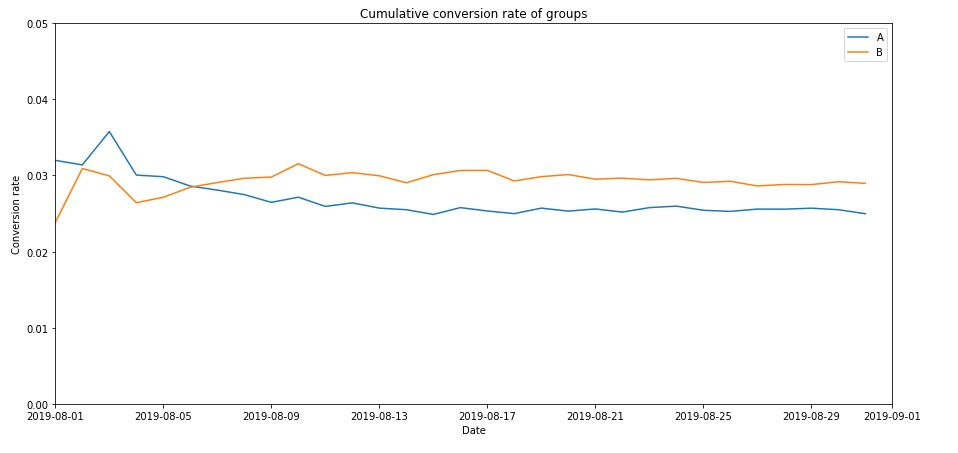
 
  - At several points the difference between the segments spikes. This means there must be some big orders and outliers! We'll find them later. The average order size of group B is comparatively bigger than the average order size of group A in the second half of the test period.
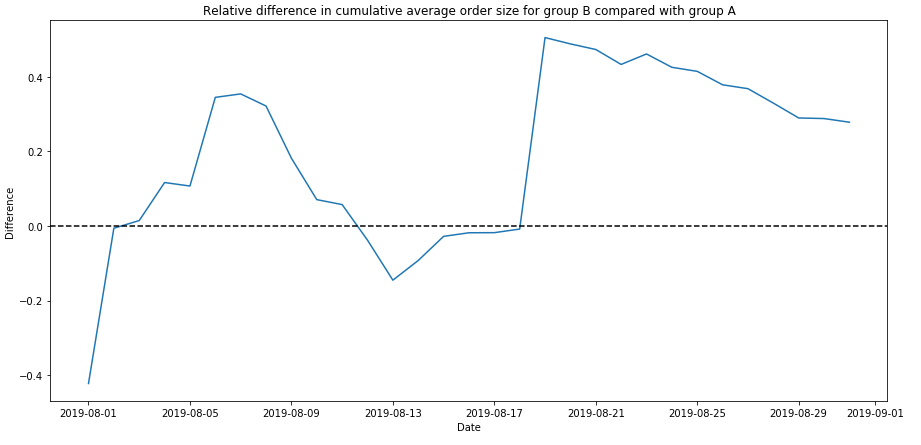

 - We have found out that there were 72 abnormal users(outliers) in our dataframe but their effect was not significant

 - At this point, we can conclude that we came to the end of our analysis of the hypothesis and **call it success and move to the next hypothesis**.